In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Load and preprocess CIFAR-10
def load_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    y_train, y_test = to_categorical(y_train), to_categorical(y_test)
    return x_train, x_test, y_train, y_test


In [3]:
# Residual Block
def residual_block(x, filters):
    shortcut = x
    x = layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

In [4]:
# Build simplified ResNet model
def build_model():
    inputs = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = residual_block(x, 32)
    x = layers.MaxPooling2D()(x)

    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = residual_block(x, 64)
    x = layers.MaxPooling2D()(x)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# Plotting utilities
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [6]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


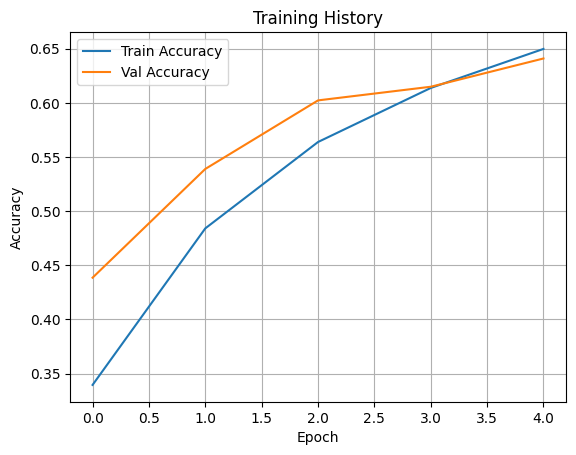

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.71      0.65      1000
           1       0.63      0.92      0.75      1000
           2       0.47      0.58      0.52      1000
           3       0.51      0.37      0.43      1000
           4       0.63      0.47      0.54      1000
           5       0.62      0.50      0.56      1000
           6       0.55      0.86      0.67      1000
           7       0.84      0.56      0.67      1000
           8       0.91      0.59      0.72      1000
           9       0.75      0.71      0.73      1000

    accuracy                           0.63     10000
   macro avg       0.65      0.63      0.62     10000
weighted avg       0.65      0.63      0.62     10000



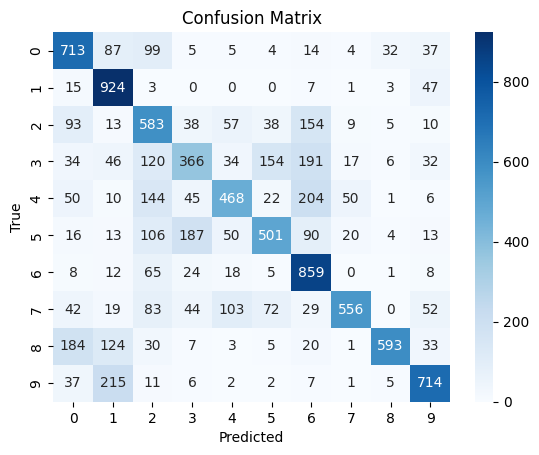

In [7]:
# Main training and evaluation pipeline
def run():
    x_train, x_test, y_train, y_test = load_data()
    model = build_model()
    history = model.fit(x_train, y_train, epochs=5, validation_split=0.2, batch_size=64, verbose=0)

    plot_history(history)

    y_pred = model.predict(x_test)
    print("\nClassification Report:\n")
    print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
    plot_confusion_matrix(y_test, y_pred)

run()